In [940]:
# Data Preprocessing
# Read data from external file
import pandas as pd
d1 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Train.csv")

In [941]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Medication  414 non-null    int64  
 1   Family      414 non-null    int64  
 2   Age         414 non-null    int64  
 3   Gender      414 non-null    int64  
 4   Height      414 non-null    float64
 5   Weight      414 non-null    float64
 6   Status      414 non-null    int64  
 7   Income      414 non-null    int64  
 8   Location    414 non-null    int64  
 9   Education   414 non-null    int64  
 10  Active      414 non-null    int64  
 11  Exercise    414 non-null    float64
 12  Veges       414 non-null    int64  
 13  Water       414 non-null    int64  
 14  Sugar       414 non-null    float64
 15  Outside     414 non-null    int64  
 16  Meal        414 non-null    int64  
 17  Snack       414 non-null    int64  
 18  Smoke       414 non-null    int64  
 19  Concious    414 non-null    i

In [942]:
d1.head()

,Medication,Family,Age,Gender,Height,Weight,Status,Income,Location,Education,...,Outside,Meal,Snack,Smoke,Concious,Stress,Sleep,Screen,Transport,Diabetes
0,0,1,63,1,174.0,98.0,0,4500,1,1,...,3,3,3,1,1,1,5,6,0,1
1,1,1,56,1,172.0,77.0,0,9000,2,0,...,2,3,1,1,1,1,6,7,0,1
2,1,1,59,0,165.0,70.0,0,10000,2,0,...,1,2,2,0,1,1,6,10,0,0
3,1,1,43,1,168.0,68.0,0,3400,0,1,...,2,2,3,1,1,1,5,6,0,1
4,0,1,41,0,154.0,55.0,0,7500,1,0,...,0,2,1,0,0,2,5,8,0,0


In [943]:
# Data slicing 
x1 = d1.iloc[:, 0:24] #features
y1 = d1.iloc[:, 24:25] #label

In [944]:
x1.head()

,Medication,Family,Age,Gender,Height,Weight,Status,Income,Location,Education,...,Sugar,Outside,Meal,Snack,Smoke,Concious,Stress,Sleep,Screen,Transport
0,0,1,63,1,174.0,98.0,0,4500,1,1,...,3.0,3,3,3,1,1,1,5,6,0
1,1,1,56,1,172.0,77.0,0,9000,2,0,...,1.0,2,3,1,1,1,1,6,7,0
2,1,1,59,0,165.0,70.0,0,10000,2,0,...,1.0,1,2,2,0,1,1,6,10,0
3,1,1,43,1,168.0,68.0,0,3400,0,1,...,1.0,2,2,3,1,1,1,5,6,0
4,0,1,41,0,154.0,55.0,0,7500,1,0,...,1.0,0,2,1,0,0,2,5,8,0


In [945]:
y1.head()

,Diabetes
0,1
1,1
2,0
3,1
4,0


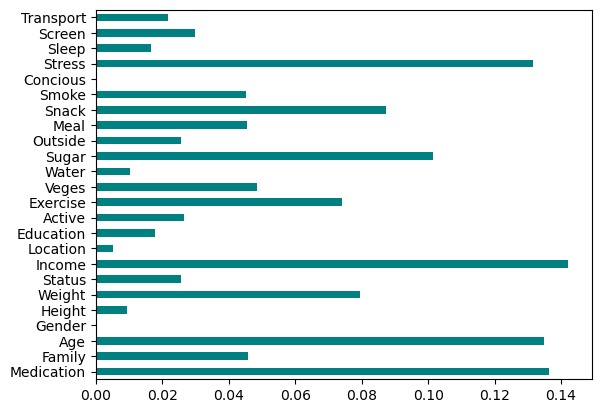

In [946]:
# Best using Features Selection: mutual_info_classif
# Convert dataframe to array 
x1 = x1.values 
y1 = y1.values 
y1 = y1.ravel() 

# Run ferature selection algo.
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(x1, y1)

#display index 1 until 11 (features column)
feat_importances = pd.Series(importances, d1.columns[0:24]) 
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [947]:
# Data slicing 
x1 = d1.loc[:, ['Age', 'Snack', 'Stress', 'Sugar', 'Income', 'Medication']] 

In [948]:
x1.head()

,Age,Snack,Stress,Sugar,Income,Medication
0,63,3,1,3.0,4500,0
1,56,1,1,1.0,9000,1
2,59,2,1,1.0,10000,1
3,43,3,1,1.0,3400,1
4,41,1,2,1.0,7500,0


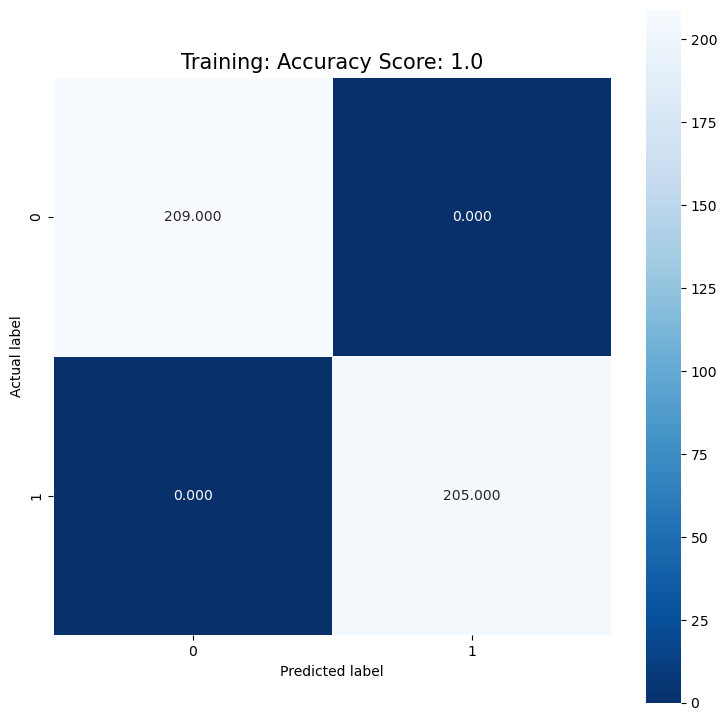

In [949]:
# K-Nearest Neighbor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier 
ModelAKU = KNeighborsClassifier(n_neighbors=8, weights='distance', metric = 'hamming', algorithm='ball_tree', leaf_size=20)  # <<<<< insert the best parameters from experiment works

# Above ( ModelAKU = KNeighborsClassifier() ) same as below 
#ModelAKU = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) 

ModelAKU.fit(x1, y1) 
yPred1 = ModelAKU.predict(x1) 

# Testing & performance analysis -Trainning data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y1, yPred1), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Training: Accuracy Score: {0}'.format(skm.accuracy_score(y1, yPred1)) 
plt.title(all_sample_title, size = 15);

In [950]:
# Read data from external file 
import pandas as pd 
d2 = pd.read_csv("C:/Users/User/OneDrive/Documents/Group Project/group_project_dataIT-Test.csv") 

In [951]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Medication  104 non-null    int64  
 1   Family      104 non-null    int64  
 2   Age         104 non-null    int64  
 3   Gender      104 non-null    int64  
 4   Height      104 non-null    float64
 5   Weight      104 non-null    float64
 6   Status      104 non-null    int64  
 7   Income      104 non-null    int64  
 8   Location    104 non-null    int64  
 9   Education   104 non-null    int64  
 10  Active      104 non-null    int64  
 11  Exercise    104 non-null    float64
 12  Veges       104 non-null    int64  
 13  Water       104 non-null    int64  
 14  Sugar       104 non-null    float64
 15  Outside     104 non-null    int64  
 16  Meal        104 non-null    int64  
 17  Snack       104 non-null    int64  
 18  Smoke       104 non-null    int64  
 19  Concious    104 non-null    i

In [952]:
d2.head()

,Medication,Family,Age,Gender,Height,Weight,Status,Income,Location,Education,...,Outside,Meal,Snack,Smoke,Concious,Stress,Sleep,Screen,Transport,Diabetes
0,1,1,46,1,163.0,65.0,0,1,2,0,...,7,3,2,1,1,3,6,10,0,0
1,1,0,52,1,174.0,88.0,0,6000,2,2,...,3,2,2,0,1,1,6,6,0,1
2,0,0,27,0,167.0,80.0,1,4500,2,0,...,7,3,2,0,1,2,8,9,0,0
3,1,0,46,1,166.0,66.0,0,2900,1,1,...,5,3,1,1,0,2,7,8,0,0
4,1,0,44,1,180.0,117.0,0,4450,1,0,...,2,2,2,1,1,1,5,4,0,0


In [953]:
#Data slicing 
x2 = d2.loc[:, ['Age', 'Snack', 'Stress', 'Sugar', 'Income', 'Medication']] #features
y2 = d2.iloc[:, 24:25] #label

In [954]:
x2.head()

,Age,Snack,Stress,Sugar,Income,Medication
0,46,2,3,1.0,1,1
1,52,2,1,1.0,6000,1
2,27,2,2,0.0,4500,0
3,46,1,2,2.0,2900,1
4,44,2,1,1.0,4450,1


In [955]:
y2.head()

,Diabetes
0,0
1,1
2,0
3,0
4,0


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


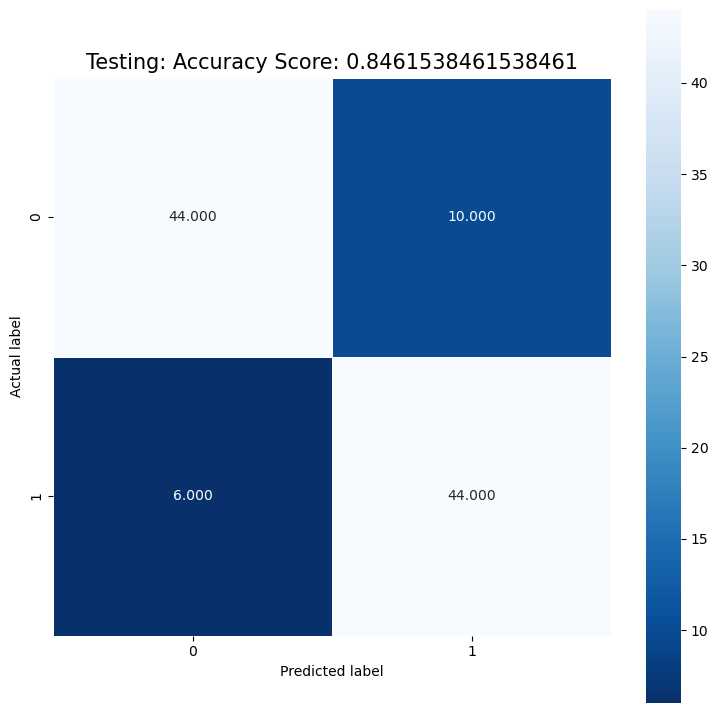

In [956]:
# Convert dataframe to array 
x2 = x2.values 
y2 = y2.values 
y2 = y2.ravel() 
 
yPred2 = ModelAKU.predict(x2) 

# Testing & performance analysis -Testing data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2)) 
plt.title(all_sample_title, size = 15);